<a href="https://colab.research.google.com/github/RodrigoVolpiano/Tech_Challenge_Fase_2/blob/main/Tech_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TECH CHALLENGE 2**

**Sobre os campos que deverão ser analisados:**


A tabela de dados históricos do Índice Bovespa fornece um resumo do  comportamento do principal indicador da bolsa de valores brasileira, a B3, em um determinado dia de negociação. Cada coluna representa um aspecto fundamental do desempenho do índice naquele pregão.

---

1.   **Data:**
 este campo indica o dia, mês e ano a que se referem os dados de
negociação. Cada linha da tabela corresponde a um pregão específico, permitindo a análise da evolução do índice ao longo do tempo.

---

2.   **Último:** refere-se ao valor de fechamento do Índice Bovespa na data especificada. É o último valor calculado para o índice no final do pregão. Este é o número mais utilizado para representar o desempenho do índice em um determinado dia.

---

3.   **Abertura:** indica o valor de abertura do índice, ou seja, o seu primeiro
valor registrado no início do pregão daquele dia. Este valor pode ser diferente do fechamento do dia anterior devido a eventos ocorridos fora do horário de negociação (como negociações no after-market ou notícias relevantes) que influenciam as expectativas dos investidores.

---

4.   **Máxima:** este campo mostra o ponto mais alto que o Índice Bovespa atingiu durante todo o período de negociação (pregão) daquela data. A máxima representa o pico de otimismo ou a maior força compradora do mercado no dia.

---

5.   **Mínima:** apresenta o ponto mais baixo que o Índice Bovespa alcançou durante o pregão. A mínima representa o pico de pessimismo ou a maior força vendedora do mercado no dia. A diferença entre a máxima e a mínima indica a volatilidade do índice no intradia.

---

6.   **Vol. (Volume):** este campo representa o volume financeiro total negociado das ações que compõem a carteira teórica do Ibovespa durante o dia. Um volume elevado geralmente indica maior liquidez e convicção nos movimentos de preço. O valor é tipicamente expresso em moeda local (Reais - BRL) e abreviado.

---

7.   **Var% (Variação Percentual):** indica a mudança percentual do valor do índice, comparando o preço de fechamento ("Último") do dia atual com o preço de fechamento do dia anterior. É a forma mais comum de medir o rendimento diário do índice. Um sinal de + indica um ganho, enquanto um sinal de - indicaria uma perda.

---

In [ ]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Importando a base de dados com dados históricos de Jan/2018 até Jun/2025+

df = pd.read_csv("https://github.com/RodrigoVolpiano/Tech_Challenge_Fase_2/raw/17023bd9c8d9829a5de4f8922f65474635bb63a4/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv")

In [ ]:
#Visualizando a base de dados

df.tail(20)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
3828,01.02.2010,66.572,65.402,66.763,65.362,"1,49M","1,79%"
3829,29.01.2010,65.402,65.591,66.576,65.140,"1,82M","-0,28%"
3830,28.01.2010,65.588,65.071,66.049,64.541,"1,65M","0,80%"
3831,27.01.2010,65.070,65.527,65.663,64.553,"1,81M","-0,69%"
3832,26.01.2010,65.524,66.213,66.213,64.719,"1,99M","-1,05%"
3833,22.01.2010,66.220,66.264,66.660,65.445,"1,30M","-0,08%"
3834,21.01.2010,66.270,68.200,68.458,65.996,"2,26M","-2,83%"
3835,20.01.2010,68.200,69.901,69.901,67.546,"1,99M","-2,44%"
3836,19.01.2010,69.909,69.396,70.036,68.867,"1,32M","0,73%"
3837,18.01.2010,69.401,68.983,69.748,68.983,"1,14M","0,61%"


In [ ]:
#Principais dados do data frame

df.describe()

,Último,Abertura,Máxima,Mínima
count,3848.00000,3848.000000,3848.000000,3848.000000
mean,82.79971,82.782929,83.522269,82.053955
std,28.41425,28.401825,28.554172,28.258686
min,37.49700,37.501000,38.031000,37.046000
25%,57.25350,57.253750,57.846250,56.705500
50%,72.25850,72.204000,72.999000,71.347500
75%,109.93200,109.922750,110.803000,108.586500
max,141.26400,141.265000,141.564000,140.597000


In [ ]:
# Analisando o tipo dos dados do df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3848 entries, 0 to 3847
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      3848 non-null   object 
 1   Último    3848 non-null   float64
 2   Abertura  3848 non-null   float64
 3   Máxima    3848 non-null   float64
 4   Mínima    3848 non-null   float64
 5   Vol.      3847 non-null   object 
 6   Var%      3848 non-null   object 
dtypes: float64(4), object(3)
memory usage: 210.6+ KB


In [ ]:
#Convertendo o campo "Data" em data

df["Data"] = pd.to_datetime(df["Data"], format='%d.%m.%Y')

In [ ]:
# Analisando o tipo dos dados do df para ver se a data foi formatada corretamente

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3848 entries, 0 to 3847
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      3848 non-null   datetime64[ns]
 1   Último    3848 non-null   float64       
 2   Abertura  3848 non-null   float64       
 3   Máxima    3848 non-null   float64       
 4   Mínima    3848 non-null   float64       
 5   Vol.      3847 non-null   object        
 6   Var%      3848 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 210.6+ KB


In [ ]:
# Visualizando o df

df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-07-11,136.187,136.742,136.742,135.528,"7,40B","-0,41%"
1,2025-07-10,136.743,137.472,137.472,136.014,"9,57B","-0,54%"
2,2025-07-09,137.481,139.303,139.331,137.299,"7,58B","-1,31%"
3,2025-07-08,139.303,139.491,139.591,138.770,"6,75B","-0,13%"
4,2025-07-07,139.490,141.265,141.342,139.295,"6,12B","-1,26%"


In [ ]:
# Colocando a data como index

df.set_index('Data', inplace=True)

In [ ]:
#Renomeando colunas e convertendo a variação para percentual

df.rename(columns={'Último': 'Ultimo', 'Máxima': 'Max', 'Mínima': 'Min', 'Vol.': 'Vol', 'Var%': 'Var'}, inplace=True)
df['Var'] = df['Var'].str.replace('%', '').str.replace(',', '.').astype(float) / 100

In [ ]:
# Visualizando o df

df.tail(20)

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2010-02-01,66.572,65.402,66.763,65.362,"1,49M",0.0179
2010-01-29,65.402,65.591,66.576,65.140,"1,82M",-0.0028
2010-01-28,65.588,65.071,66.049,64.541,"1,65M",0.0080
2010-01-27,65.070,65.527,65.663,64.553,"1,81M",-0.0069
2010-01-26,65.524,66.213,66.213,64.719,"1,99M",-0.0105
2010-01-22,66.220,66.264,66.660,65.445,"1,30M",-0.0008
2010-01-21,66.270,68.200,68.458,65.996,"2,26M",-0.0283
2010-01-20,68.200,69.901,69.901,67.546,"1,99M",-0.0244
2010-01-19,69.909,69.396,70.036,68.867,"1,32M",0.0073


In [ ]:
# Checando a existência de dados nulos

df.isnull().sum()

,0
Ultimo,0
Abertura,0
Max,0
Min,0
Vol,1
Var,0


In [ ]:
# Função para converter em bilhão/milhão/milhares o campo "Vol"

def convert_volume(volume):
    if isinstance(volume, str):
        if volume.endswith('B'):
            return float(volume[:-1].replace(',', '.')) #* 1_000_000_000
        elif volume.endswith('M'):
            return float(volume[:-1].replace(',', '.')) #* 1_000_000
        elif volume.endswith('K'):
            return float(volume[:-1].replace(',', '.')) #* 1_000

    return float(volume)

df['Vol'] = df['Vol'].apply(convert_volume)

In [ ]:
# Deixando toda o volume na casa do R$ bilhão

#df['Vol'] = df['Vol'] / 1_000_000_000

In [ ]:
# Organizando o df da menor data para a maior

df.sort_index(inplace=True)

In [ ]:
# Visualizando o df

df.tail(20)

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2025-06-13,137.213,137.800,137.800,136.586,8.63,-0.0043
2025-06-16,139.256,137.212,139.988,137.212,7.62,0.0149
2025-06-17,138.840,139.256,139.497,138.293,8.38,-0.0030
2025-06-18,138.717,138.844,139.161,138.443,8.32,-0.0009
2025-06-20,137.116,138.715,138.719,136.815,11.29,-0.0115
2025-06-23,136.551,137.116,137.130,135.835,7.73,-0.0041
2025-06-24,137.165,136.552,138.156,136.254,8.08,0.0045
2025-06-25,135.767,137.163,137.163,135.565,7.71,-0.0102
2025-06-26,137.114,135.767,137.353,135.756,8.02,0.0099


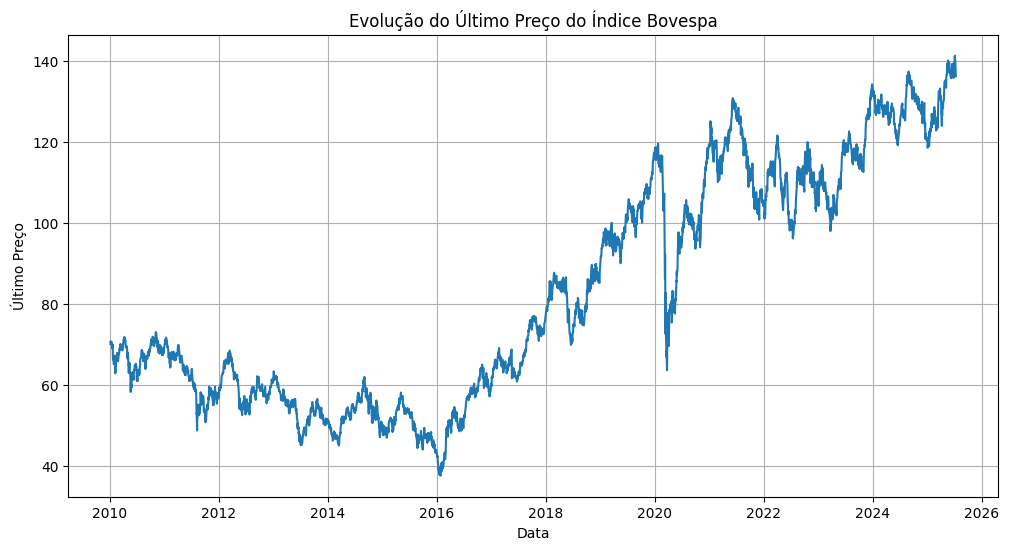

In [ ]:
# Coluna "Ultimo"

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ultimo'])
plt.title('Evolução do Último Preço do Índice Bovespa')
plt.xlabel('Data')
plt.ylabel('Último Preço')
plt.grid(True)
plt.show()

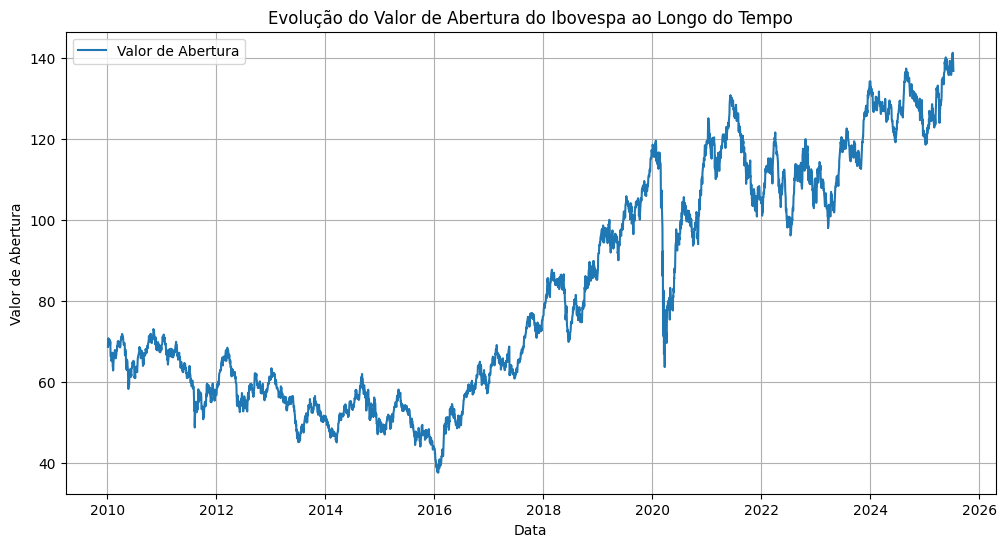

In [ ]:
# Coluna "Abertura"

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Abertura'], label='Valor de Abertura')
plt.title('Evolução do Valor de Abertura do Ibovespa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor de Abertura')
plt.grid(True)
plt.legend()
plt.show()

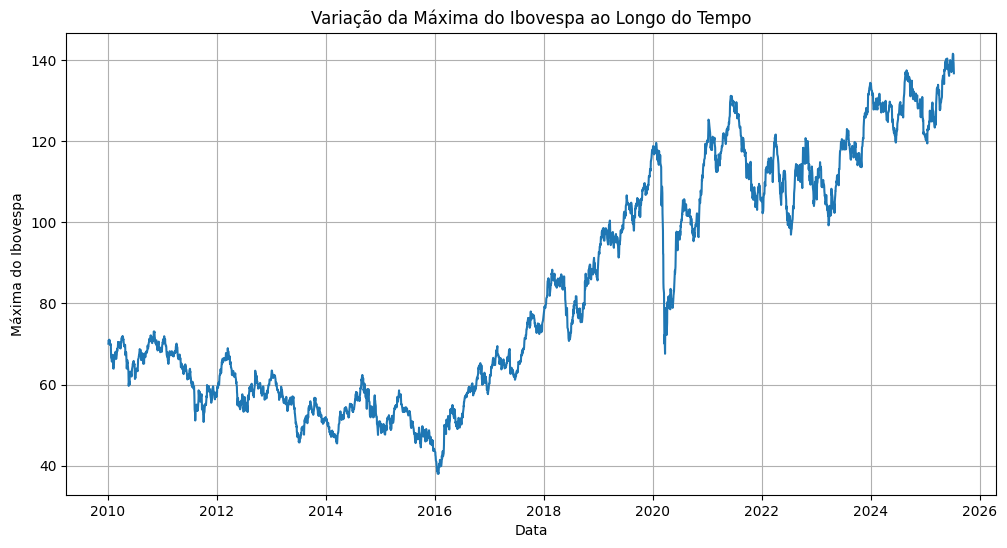

In [ ]:
# Coluna "Max"

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Max')
plt.title('Variação da Máxima do Ibovespa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Máxima do Ibovespa')
plt.grid(True)
plt.show()

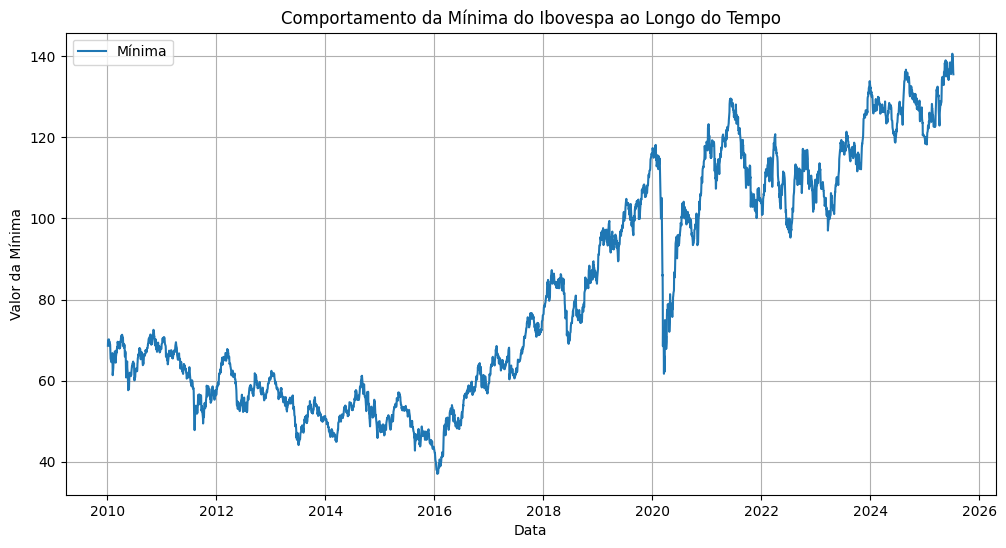

In [ ]:
# Coluna "Min"

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Min'], label='Mínima')
plt.title('Comportamento da Mínima do Ibovespa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor da Mínima')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Realizando a análise do gráfico abaixo, percebi que o dia 01/07/2019 estava como 424,32K, o que estava sujando a análise,
# por isso o retirei

df["Vol"].sort_values(ascending=False).head(20)

,Vol
Data,
2010-11-25,981.63
2017-07-04,980.07
2010-06-28,943.30
2010-02-10,891.04
2010-02-12,873.28
2017-01-02,833.73
2010-07-05,759.93
2014-07-04,753.84
2016-12-26,701.23


In [ ]:
df.drop('2010-11-25', inplace=True)
df.drop('2017-07-04', inplace=True)
df.drop('2010-06-28', inplace=True)
df.drop('2010-02-10', inplace=True)
df.drop('2010-02-12', inplace=True)
df.drop('2017-01-02', inplace=True)
df.drop('2010-07-05', inplace=True)
df.drop('2014-07-04', inplace=True)
df.drop('2016-12-26', inplace=True)
df.drop('2012-07-31', inplace=True)
df.drop('2011-05-30', inplace=True)
df.drop('2011-12-26', inplace=True)
df.drop('2010-09-06', inplace=True)
df.drop('2019-07-01', inplace=True)

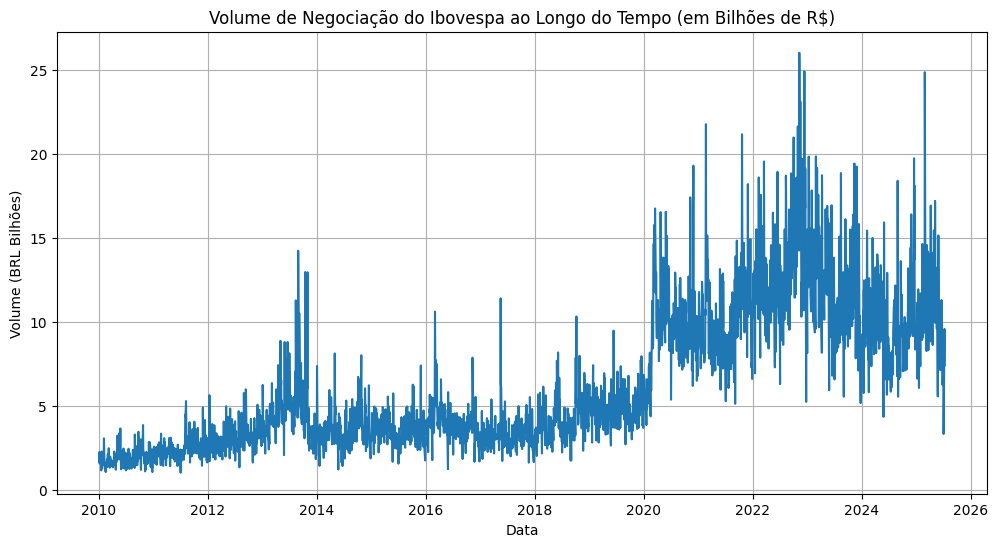

In [ ]:
# Coluna "Vol"

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Vol')
plt.title('Volume de Negociação do Ibovespa ao Longo do Tempo (em Bilhões de R$)')
plt.xlabel('Data')
plt.ylabel('Volume (BRL Bilhões)')
plt.grid(True)
plt.show()

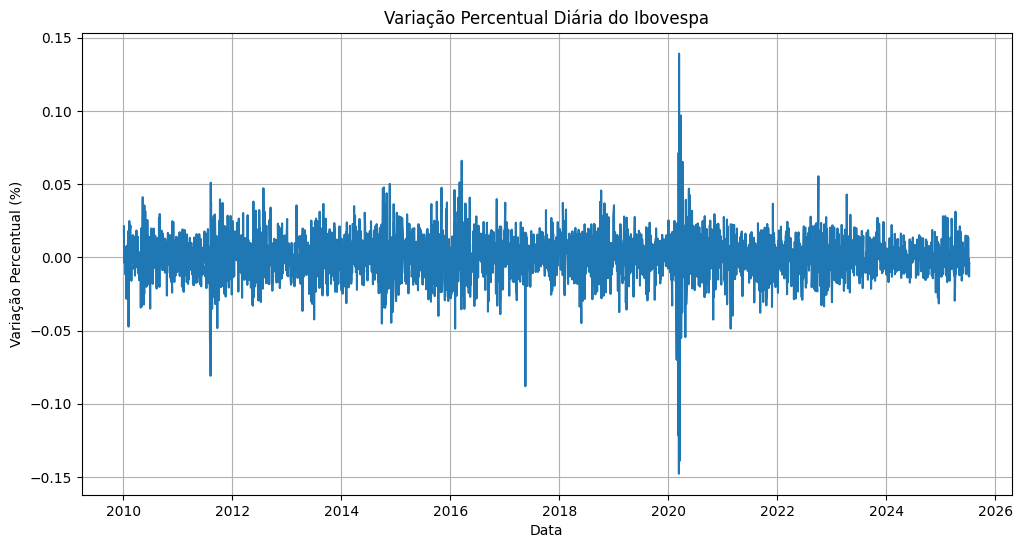

In [ ]:
# Coluna "Var"

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Var')
plt.title('Variação Percentual Diária do Ibovespa')
plt.xlabel('Data')
plt.ylabel('Variação Percentual (%)')
plt.grid(True)
plt.show()

In [ ]:
df.tail(15)

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2025-06-23,136.551,137.116,137.130,135.835,7.73,-0.0041
2025-06-24,137.165,136.552,138.156,136.254,8.08,0.0045
2025-06-25,135.767,137.163,137.163,135.565,7.71,-0.0102
2025-06-26,137.114,135.767,137.353,135.756,8.02,0.0099
2025-06-27,136.866,137.113,137.209,136.469,6.24,-0.0018
2025-06-30,138.855,136.865,139.103,136.430,7.68,0.0145
2025-07-01,139.549,138.855,139.695,138.855,6.35,0.0050
2025-07-02,139.051,139.586,140.049,138.384,8.81,-0.0036
2025-07-03,140.928,139.051,141.304,139.051,6.08,0.0135


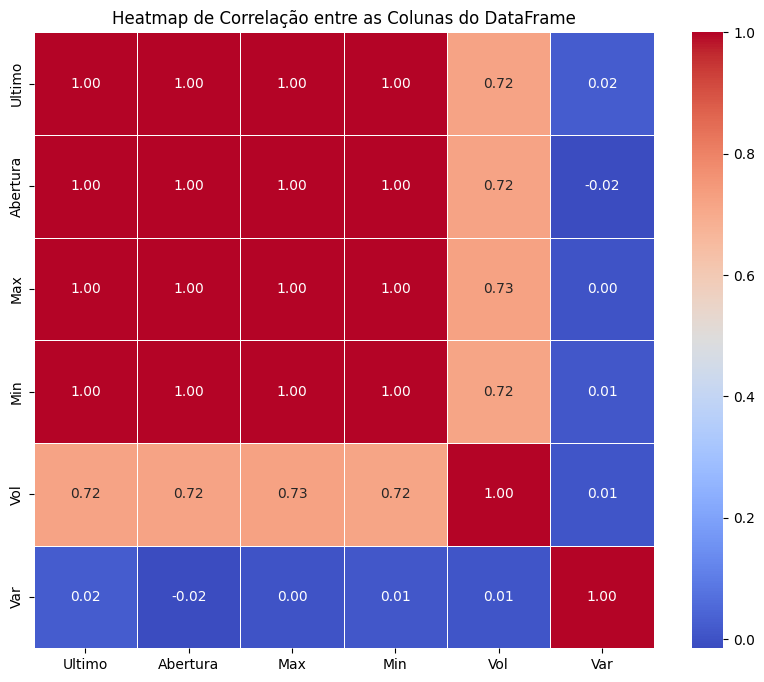

In [ ]:
# Gerando a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlação entre as Colunas do DataFrame')
plt.show()



---



#RandomForest

In [ ]:
# Preparando os dados
X = df[['Abertura', 'Max', 'Min']] # Separando as variáveis
y = df['Ultimo'] # Definindo o Target

# Separando os dados em teste e treino usando os últimos 30 dias como teste

tamanho_teste = 30
X_train, X_test = X[:-tamanho_teste], X[-tamanho_teste:]
y_train, y_test = y[:-tamanho_teste], y[-tamanho_teste:]

In [ ]:
# Definindo o random forest como o modelo de regressão
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Criando a predição na base de teste
y_pred_rf = rf_model.predict(X_test)

# Testando a efetividade do modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MSE: {mse_rf}')
print(f'R2: {r2_rf}')

MSE: 0.403425711533279
R2: 0.8075060402503016


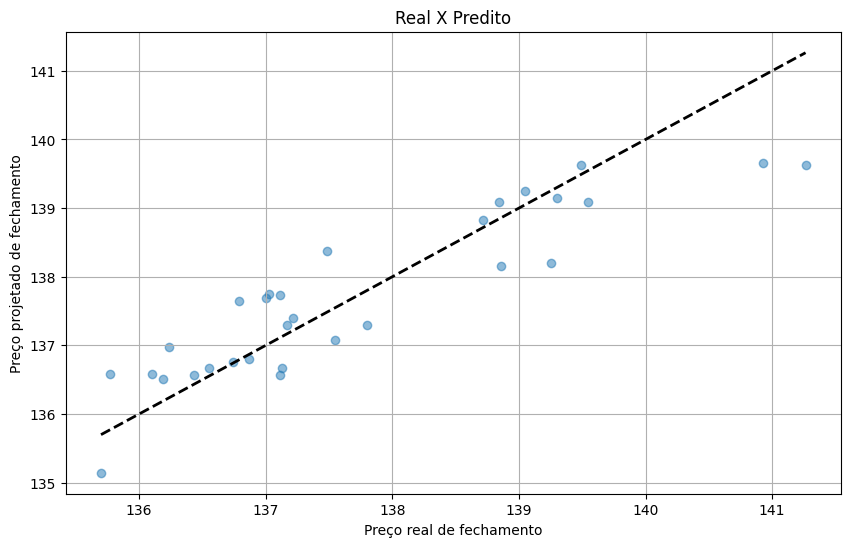

In [ ]:
# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Preço real de fechamento')
plt.ylabel('Preço projetado de fechamento')
plt.title('Real X Predito')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Linha de referência
plt.grid(True)
plt.show()

In [ ]:
# Criando um df para comparar os resultados
results_rf = pd.DataFrame({'Actual': y_test, 'Predicted (Random Forest)': y_pred_rf.round(3)})
display(results_rf)

,Actual,Predicted (Random Forest)
Data,,
2025-05-30,137.027,137.741
2025-06-02,136.787,137.642
2025-06-03,137.546,137.083
2025-06-04,137.002,137.687
2025-06-05,136.236,136.979
2025-06-06,136.102,136.585
2025-06-09,135.699,135.144
2025-06-10,136.436,136.574
2025-06-11,137.128,136.671
